In [420]:
## Importing all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [421]:
## Read the Data

dataset = pd.read_csv("HousePricePrediction.csv")

In [422]:
# Show the shape

dataset.shape

(2919, 13)

In [423]:
## Show the data description

dataset.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [424]:
## looking for null values

dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [425]:
## Replace the null values of SalePrice column with mean

dataset['SalePrice'].fillna(dataset['SalePrice'].mean(),inplace=True)

In [426]:
dataset.shape

(2919, 13)

In [427]:
##dataset['MSZoning'].dropna(inplace=True)

In [428]:
##dataset[['Exterior1st','BsmtFinSF2','TotalBsmtSF']].dropna(inplace=True)

In [429]:
dataset.shape

(2919, 13)

In [430]:
## Deleting the null Values.

dataset.dropna(inplace=True)

In [431]:
dataset


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [432]:
dataset.shape

(2913, 13)

In [433]:
dataset.drop('Id',axis=1,inplace=True)

In [434]:
dataset.shape


(2913, 12)

In [435]:
## View the co-relation Matrix.

dataset.corr()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.202661,-0.066033,0.033428,0.042057,-0.072839,-0.222397,-0.059326
LotArea,-0.202661,1.000000,-0.025024,0.031226,0.027047,0.085927,0.262102,0.237990
OverallCond,-0.066033,-0.025024,1.000000,-0.375150,0.043586,0.040980,-0.180554,-0.055299
YearBuilt,0.033428,0.031226,-0.375150,1.000000,0.611755,-0.028329,0.407691,0.369442
YearRemodAdd,0.042057,0.027047,0.043586,0.611755,1.000000,-0.062818,0.294832,0.355167
BsmtFinSF2,-0.072839,0.085927,0.040980,-0.028329,-0.062818,1.000000,0.089027,-0.007672
TotalBsmtSF,-0.222397,0.262102,-0.180554,0.407691,0.294832,0.089027,1.000000,0.433343
SalePrice,-0.059326,0.237990,-0.055299,0.369442,0.355167,-0.007672,0.433343,1.000000


<Axes: >

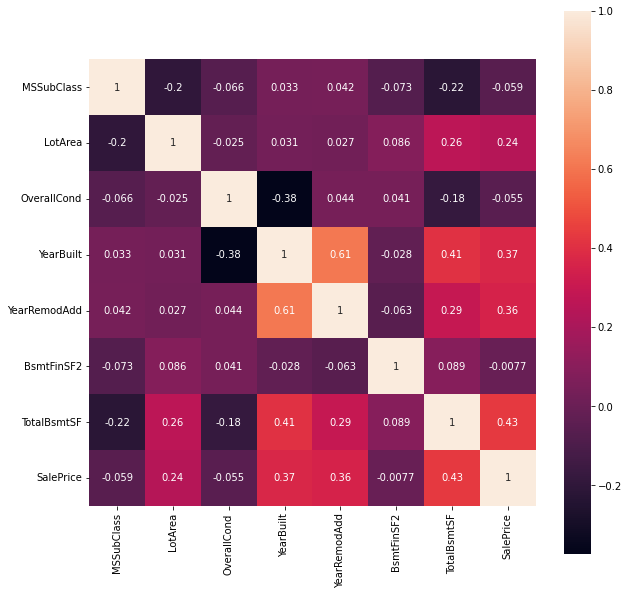

In [436]:
## View the co-relation in terms of matrix.

f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(dataset.corr(), square=True, annot=True)

In [437]:
cat_cols = dataset.select_dtypes(include=['object']).columns
num_cols = dataset.select_dtypes(include=['float64','int64']).columns

In [438]:
dataset[cat_cols].value_counts()

MSZoning  LotConfig  BldgType  Exterior1st
RL        Inside     1Fam      VinylSd        557
                               HdBoard        246
                               Wd Sdng        205
                               MetalSd        170
          Corner     1Fam      VinylSd        132
                                             ... 
          CulDSac    1Fam      WdShing          1
          Corner     TwnhsE    MetalSd          1
                               HdBoard          1
                               CemntBd          1
          FR2        Duplex    HdBoard          1
Length: 190, dtype: int64

In [439]:
num_cols

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [440]:
dataset[num_cols].corr()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
MSSubClass,1.000000,-0.202661,-0.066033,0.033428,0.042057,-0.072839,-0.222397,-0.059326
LotArea,-0.202661,1.000000,-0.025024,0.031226,0.027047,0.085927,0.262102,0.237990
OverallCond,-0.066033,-0.025024,1.000000,-0.375150,0.043586,0.040980,-0.180554,-0.055299
YearBuilt,0.033428,0.031226,-0.375150,1.000000,0.611755,-0.028329,0.407691,0.369442
YearRemodAdd,0.042057,0.027047,0.043586,0.611755,1.000000,-0.062818,0.294832,0.355167
BsmtFinSF2,-0.072839,0.085927,0.040980,-0.028329,-0.062818,1.000000,0.089027,-0.007672
TotalBsmtSF,-0.222397,0.262102,-0.180554,0.407691,0.294832,0.089027,1.000000,0.433343
SalePrice,-0.059326,0.237990,-0.055299,0.369442,0.355167,-0.007672,0.433343,1.000000


In [441]:
cat_cols

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')

In [442]:
##{'MSZoning': {'RL': 2264, 'RM': 459, 'FV': 139, 'RH': 26, 'C (all)': 25}, 'LotConfig': {'Inside': 2128, 'Corner': 511, 'CulDSac': 176, 'FR2': 85, 'FR3': 13}, 'BldgType': {'1Fam': 2419, 'TwnhsE': 227, 'Duplex': 109, 'Twnhs': 96, '2fmCon': 62}, 'Exterior1st': {'VinylSd': 1025, 'MetalSd': 449, 'HdBoard': 442, 'Wd Sdng': 409, 'Plywood': 221, 'CemntBd': 126, 'BrkFace': 87, 'WdShing': 56, 'AsbShng': 43, 'Stucco': 43, 'BrkComm': 6, 'AsphShn': 2, 'Stone': 2, 'ImStucc': 1, 'CBlock': 1}}
    
counts={}

for col in cat_cols:
    counts[col] = dataset[col].value_counts().to_dict() 

In [443]:
counts

{'MSZoning': {'RL': 2264, 'RM': 459, 'FV': 139, 'RH': 26, 'C (all)': 25},
 'LotConfig': {'Inside': 2128,
  'Corner': 511,
  'CulDSac': 176,
  'FR2': 85,
  'FR3': 13},
 'BldgType': {'1Fam': 2419,
  'TwnhsE': 227,
  'Duplex': 109,
  'Twnhs': 96,
  '2fmCon': 62},
 'Exterior1st': {'VinylSd': 1025,
  'MetalSd': 449,
  'HdBoard': 442,
  'Wd Sdng': 409,
  'Plywood': 221,
  'CemntBd': 126,
  'BrkFace': 87,
  'WdShing': 56,
  'AsbShng': 43,
  'Stucco': 43,
  'BrkComm': 6,
  'AsphShn': 2,
  'Stone': 2,
  'ImStucc': 1,
  'CBlock': 1}}

In [444]:
## Converting categorical columns to numerical

dataset = pd.get_dummies(dataset)

In [445]:
dataset.shape

(2913, 38)

In [446]:
## Split the data into train and test.

x=dataset.drop('SalePrice',axis=1)
y=dataset['SalePrice']
X_train, X_valid, Y_train, Y_valid = train_test_split(x,y,test_size=0.20,random_state=0)

In [447]:
## Train the model using Linear Regression and calculate the measures.

regression=LinearRegression()
regression.fit(X_train,Y_train)
Y_pred=regression.predict(X_valid)
mape=mean_absolute_percentage_error(Y_valid, Y_pred)
mse=mean_squared_error(Y_valid,Y_pred)
mae=mean_absolute_error(Y_valid,Y_pred)
score=r2_score(Y_valid,Y_pred)

In [448]:
## Show the measures.

print(f"MAPE for Linear Regression is: {mape:0.4f}")
print(f"R^2 for Linear Regression is: {score:0.4f}")
print(f"MSE for Linear Regression is: {mse:0.4f}")
print(f"MAE for Linear Regression is: {mae:0.4f}")

MAPE for Linear Regression is: 0.1874
R^2 for Linear Regression is: 0.3741
MSE for Linear Regression is: 1692380766.4527
MAE for Linear Regression is: 30829.9367


In [449]:
## Train the model using Random Forest Regression and calculate the metrics.

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,Y_train)
Y_pred=rf_reg.predict(X_valid)
mape=mean_absolute_percentage_error(Y_valid, Y_pred)
mse=mean_squared_error(Y_valid,Y_pred)
mae=mean_absolute_error(Y_valid,Y_pred)
score=r2_score(Y_valid,Y_pred)

In [ ]:
print(f"MAPE for RandomForest Regression is: {mape:0.4f}")
print(f"R^2 for RandomForest Regression is: {score:0.4f}")
print(f"MSE for RandomForest Regression is: {mse:0.4f}")
print(f"MAE for RandomForest Regression is: {mae:0.4f}")

In [ ]:
## Train the data using Support Vector Machines.

reg = SVR(kernel = 'rbf')
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_valid)
mape=mean_absolute_percentage_error(Y_valid, Y_pred)
mse=mean_squared_error(Y_valid,Y_pred)
mae=mean_absolute_error(Y_valid,Y_pred)
score=r2_score(Y_valid,Y_pred)

In [ ]:
print(f"MAPE for SVM is: {mape:0.4f}")
print(f"R^2 for SVM is: {score:0.4f}")
print(f"MSE for SVM is: {mse:0.4f}")
print(f"MAE for SVM is: {mae:0.4f}")

In [ ]:
### Train the data using Ridge Regression.

reg =  Ridge(alpha=1.0)
reg.fit(X_train,Y_train)
Y_pred=reg.predict(X_valid)
mape=mean_absolute_percentage_error(Y_valid, Y_pred)
mse=mean_squared_error(Y_valid,Y_pred)
mae=mean_absolute_error(Y_valid,Y_pred)
score=r2_score(Y_valid,Y_pred)

In [ ]:
print(f"MAPE for Ridge Regression is: {mape:0.4f}")
print(f"R^2 for Ridge Regression is: {score:0.4f}")
print(f"MSE for Ridge Regression is: {mse:0.4f}")
print(f"MAE for Ridge Regression is: {mae:0.4f}")